In [9]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

import sys
sys.path.append("../../")
import src.SupportOutliers as outliers

from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [10]:
df = pd.read_pickle("../../datos/03_datos_encoded.plk")

# Gestión de los Outliers
- Vamos a ver los outliers 
    - Univariados
    - Multivariados
- Los analizaremos con IsoForest

### Visualizar 

### Univariados
- Recordamos que:
    - 0: No
    - 1: Yes

In [ ]:
cols_outliers = ["BusinessTravel", "Department", "DistanceFromHome", "EducationField", "JobRole", "MaritalStatus", "NumCompaniesWorked", "TrainingTimesLastYear", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement"]

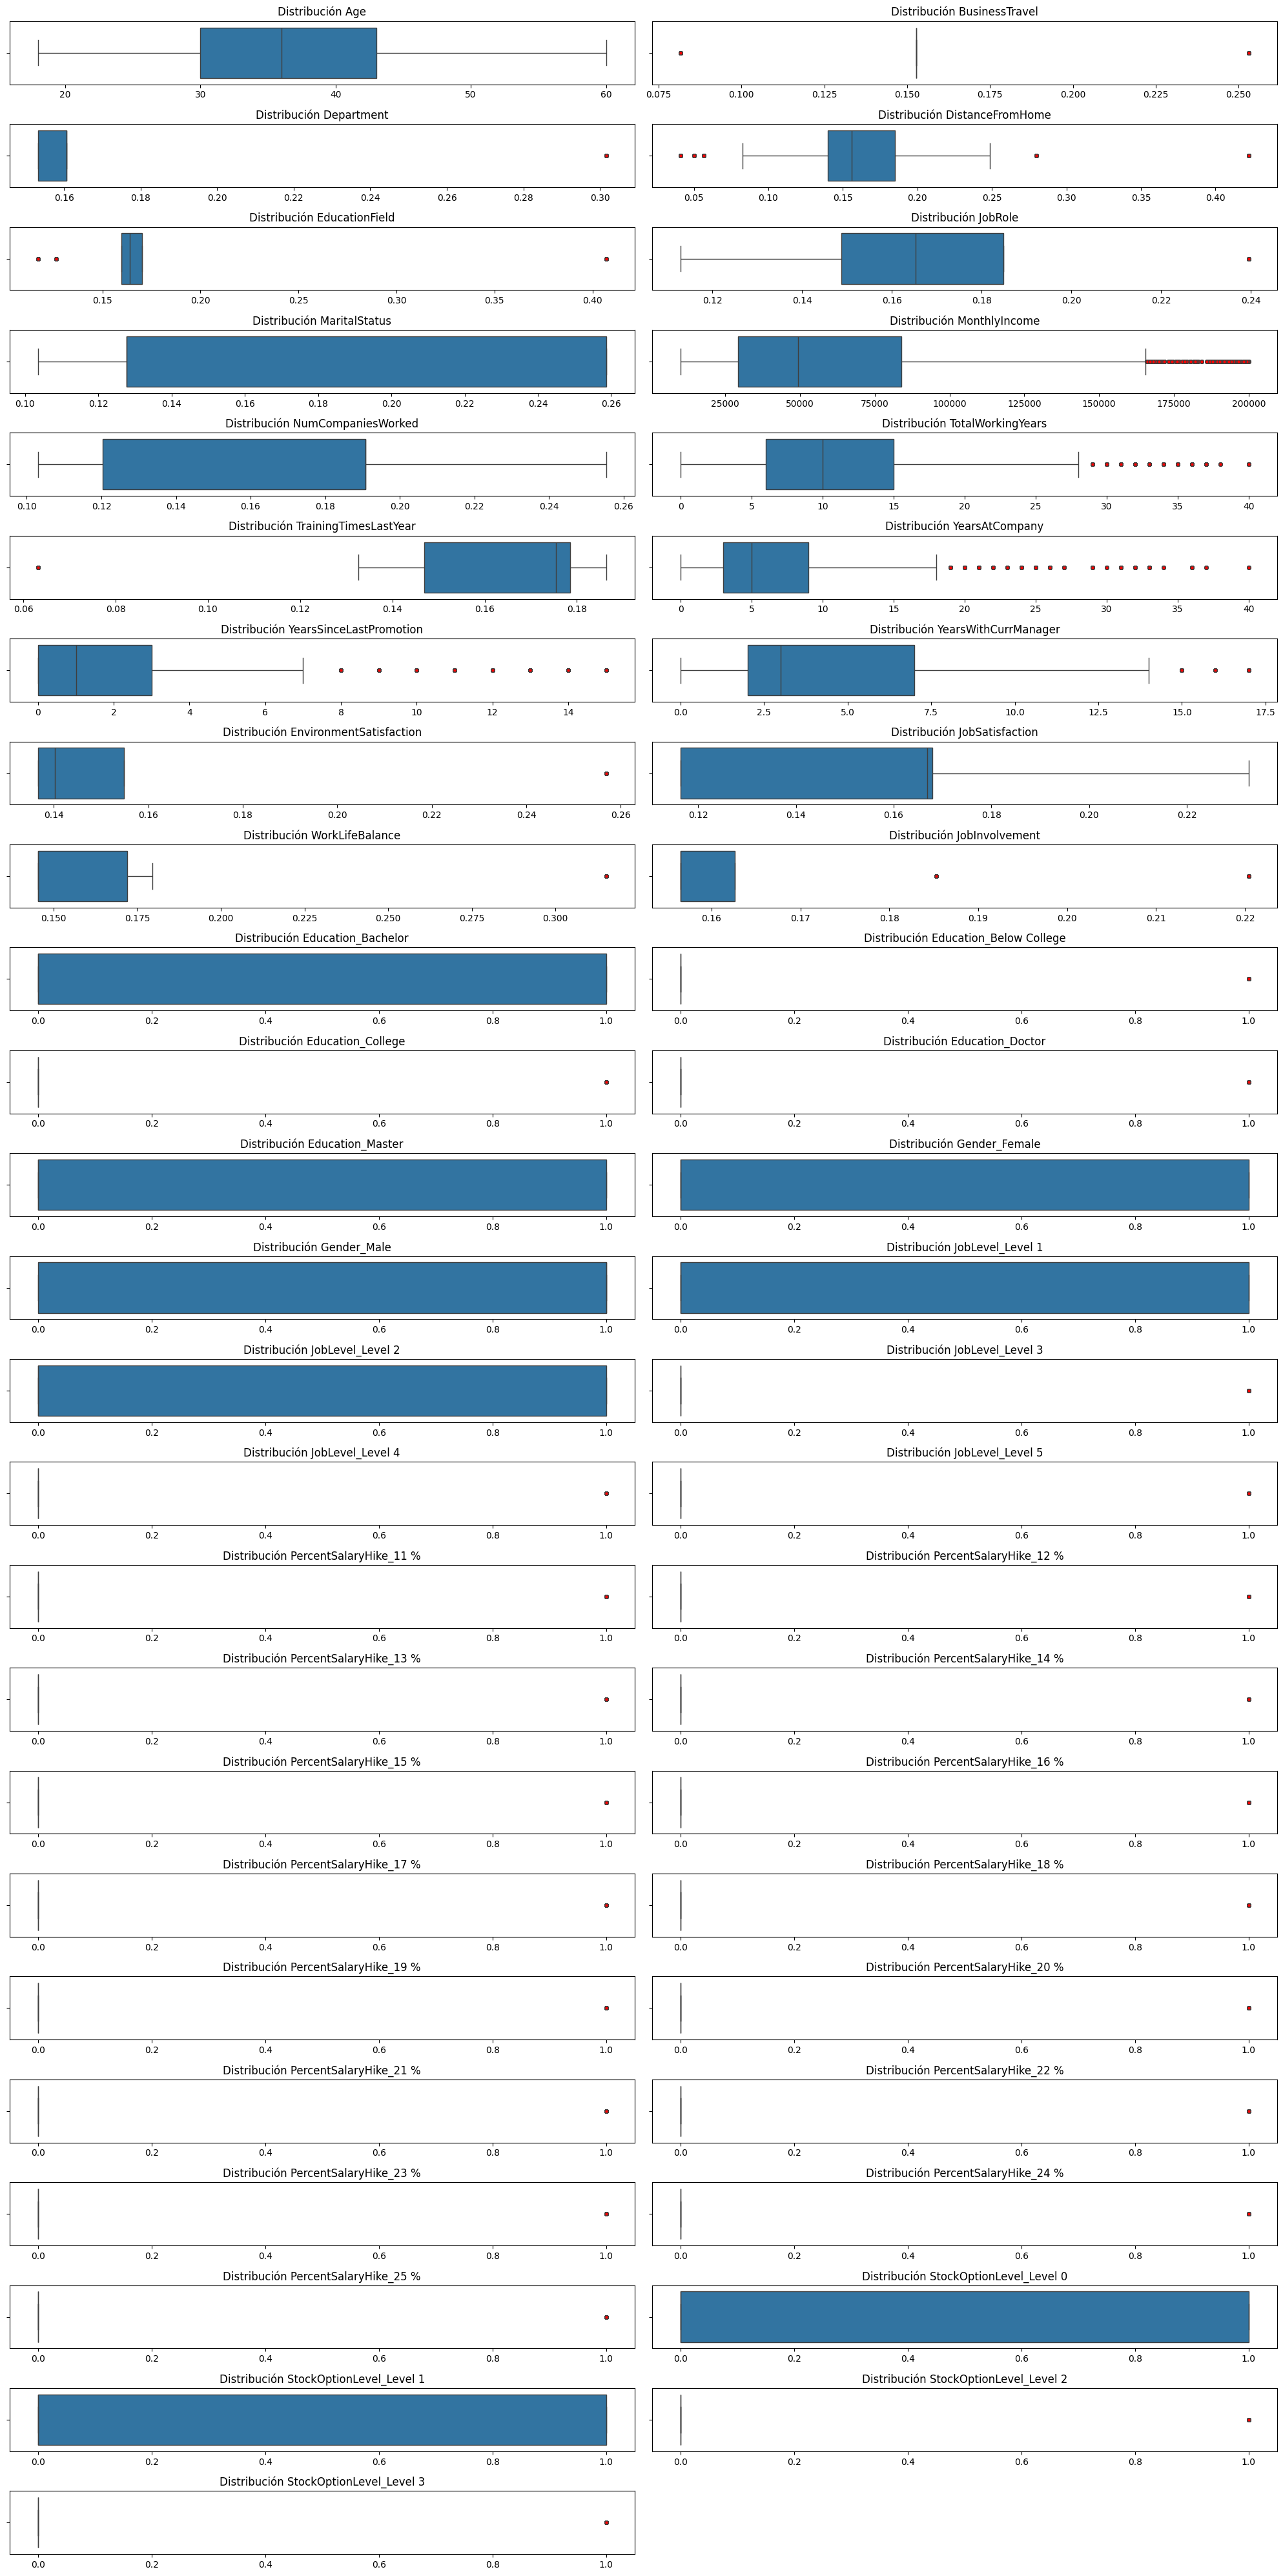

In [14]:
outliers.plot_outliers_univariados(df,"b",grafica_size=(20,40))

### Bivariados
- Recordamos que:
    - 0: No
    - 1: Yes

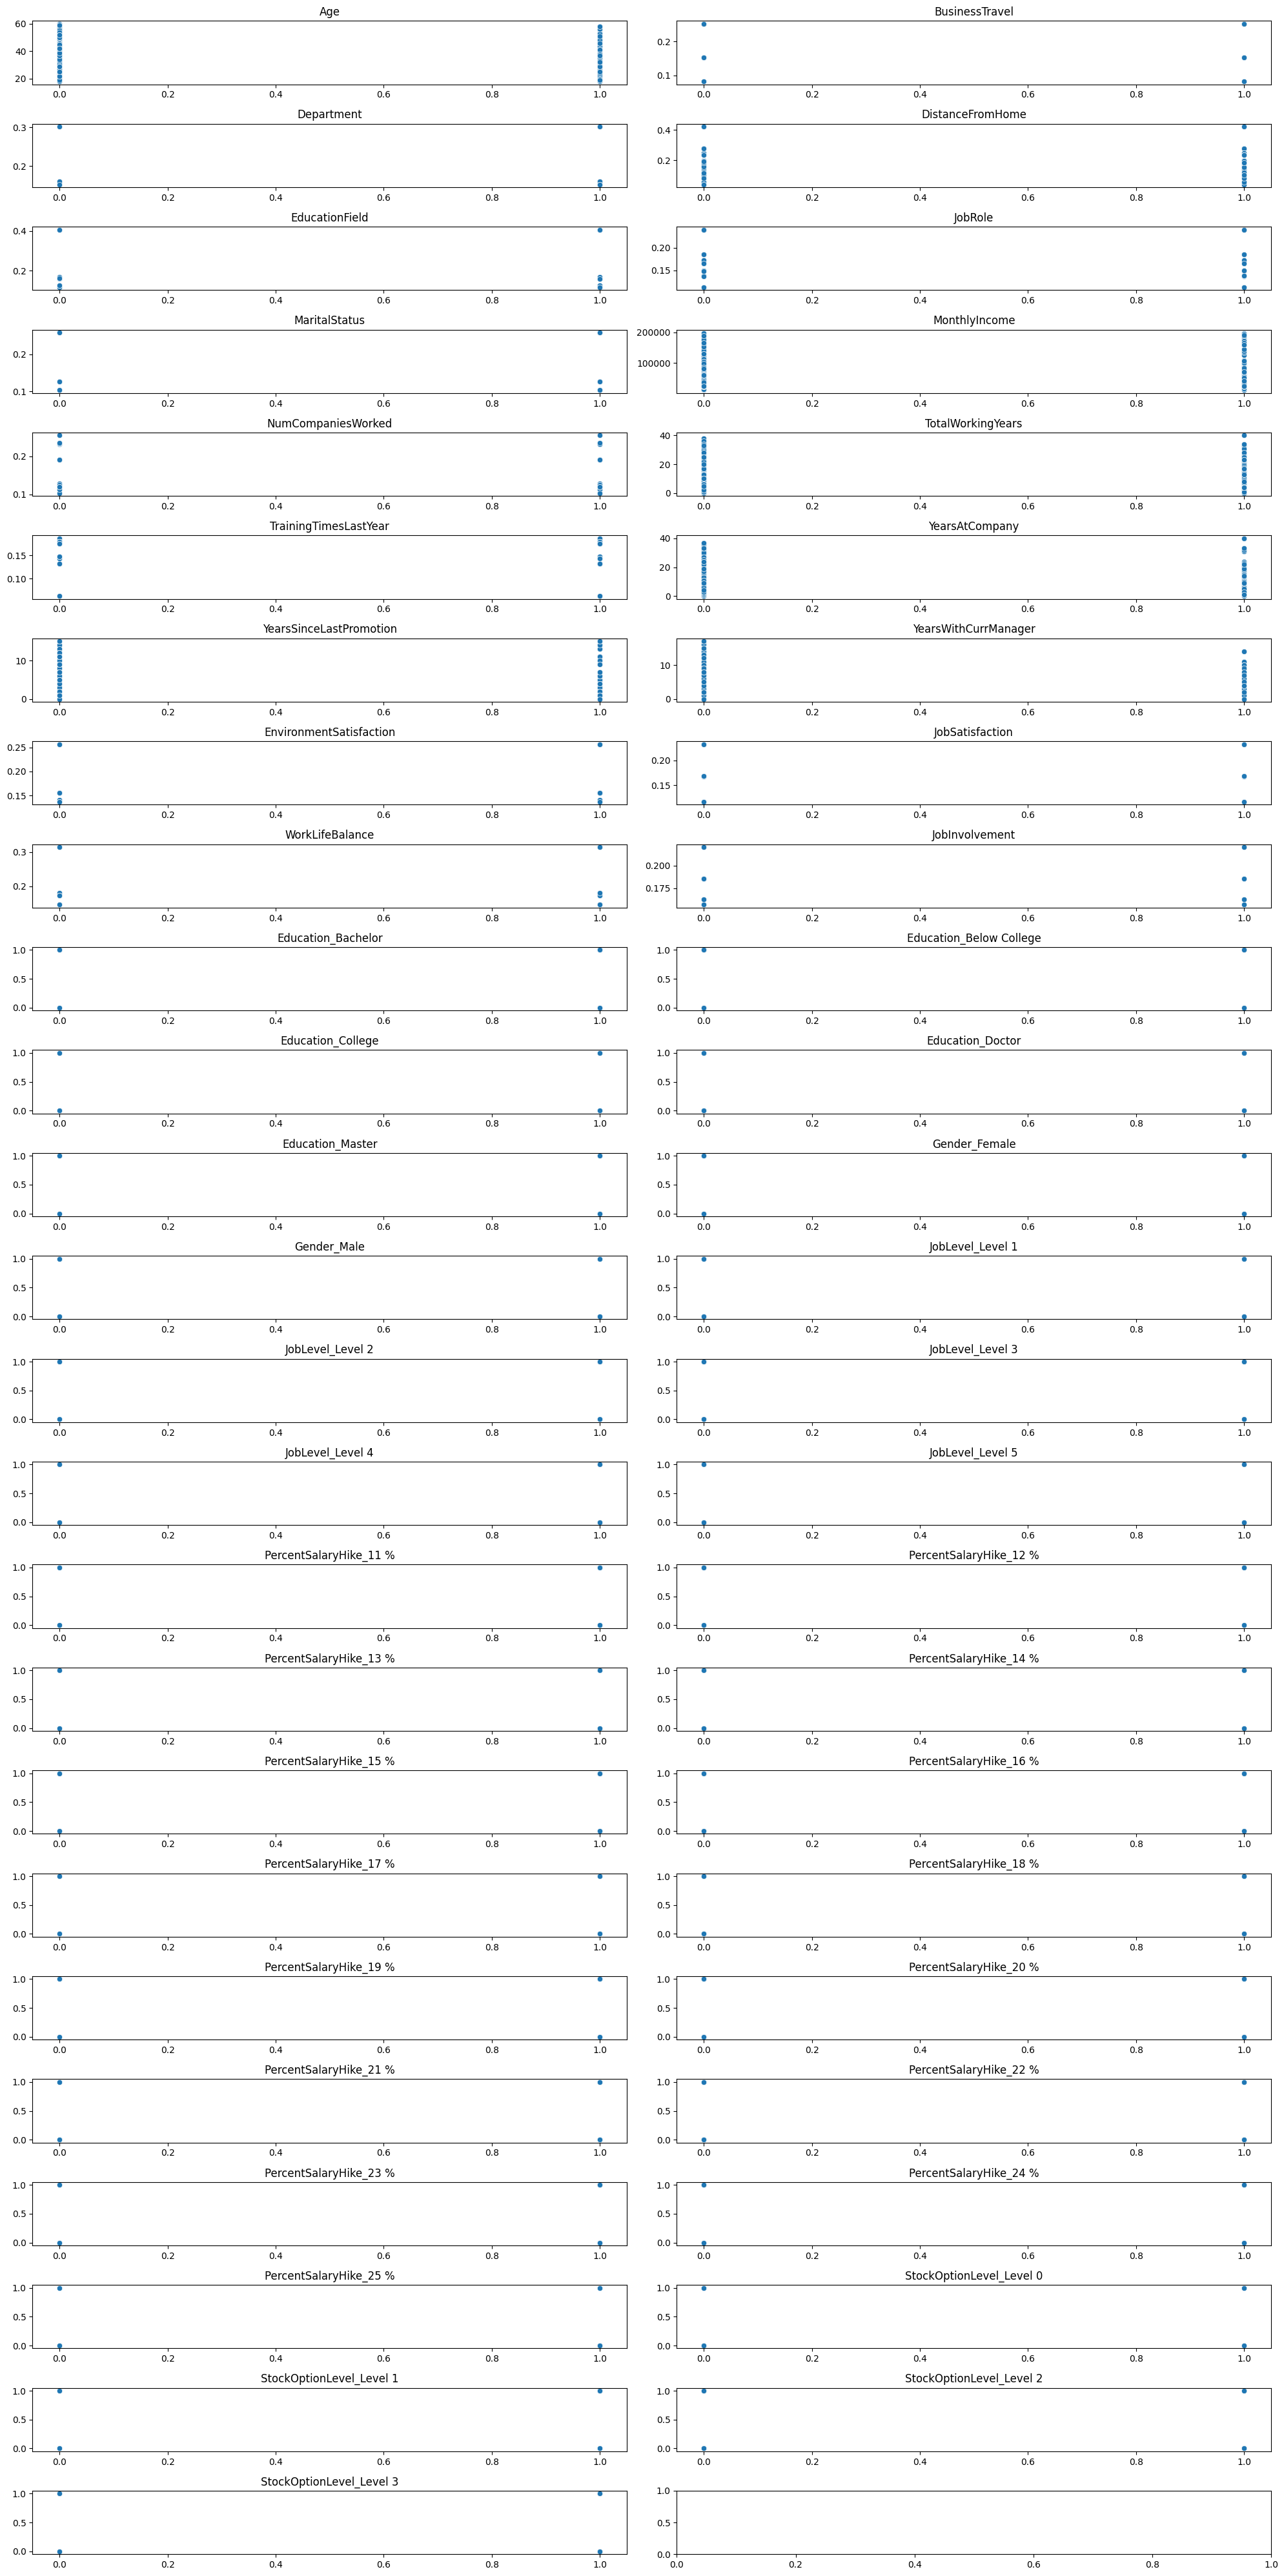

In [15]:
outliers.visualizar_outliers_bivariados(df,"Attrition",tamano_grafica=(20,40))

### Analizar outliers mediante ISO Forest

In [ ]:
outliers.explorar_outliers_if(df,)